# Particle Swarm Optimization (PSO)
Development of the standard and memetic variant heuristic-algorithm for global optimization.
1. [Introduction](#Introduction)
2. [Ackley Function](#Ackley-Function)
3. [PSO-Algorithm](#PSO-Algorithm)
    1. [Explorative Equations](#Explorative-Equations)
    2. [Update Hyperparameters](#Update-Hyperparameters)
    3. [Standard PSO Code](#Standard-PSO-Code)
4. [Memetic Variant-Algorithm](#Memetic-Variant-Algorithm)
    1. [Coordinate Descent](#Coordinate-Descent)
    2. [Memetic PSO Code](#Memetic-PSO-Code)
5. [Animation](#Animation)

## Introduction
Particle swarm optimization (PSO) has been successfully applied in many research and application areas. It is demonstrated that PSO can have better results in a faster, cheaper way compared with other methods. It can also be parallelized. Moreover, it does not use the gradient of the problem, in other words, PSO does not require the problem to be differentiable. PSO is a biologically inspired optimization routine designed to mimic birds flocking or fish schooling.

## Ackley Function
The test function chosen to be minimize is Ackley function $f:\mathbb{R}^n \to \mathbb{R}$ in <i>n-dimension</i>, let $ x \in \mathbb{R}^n $

$$ f(x) = -20 \exp \Bigg(  -0.2 \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2} \Bigg) - \exp \Bigg( \frac{1}{n} \sum_{i=1}^n \cos (2\pi x_i) \Bigg) + 20 + \exp(1) $$

with $n = 2$, the graph is,
<img src="ackley.png" width=400>

## PSO-Algorithm
PSO is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions, here dubbed particles, and moving these particles around in the search-space according to simple mathematical formula over the particle's position and velocity. 

Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles. This is expected to move the swarm toward the best solutions. We define,

- $x_k^i$: position of the <i>i-particle</i> at <i>k-iteration</i>
- $v_k^i$: velocity of the <i>i-particle</i> at <i>k-iteration</i>
- $p_k^i$: best individual particle position of the <i>i-particle</i> at <i>k-iteration</i>
- $p_k^{*}$: global best swarm position at <i>k- iteration</i>

and define hyperparameters,
- $w$: constant inertia weight
- $c_1$: cognitive parameter
- $c_2$: social parameter
- $r_1, r_2$: random numbers between 0 and 1

### Explorative Equations
For each iteration the swarm moves according to the following two equations,
$$ x_{k+1}^i = x_k^1 + v_{k+1}^i \\ v_{k+1}^i = wv_k^i + \underbrace{c_1 r_1 (p_k^i - x_k^i)}_{\text{cognitive term}} + \underbrace{c_2 r_2 (p_k^{*} - x_k^i)}_{\text{social term}}  $$
The main concept behind PSO is that there is a constant balance between three distinct forces pulling on each particle,
- <b>force of inertia</b> that pushes towards the previous velocity
- <b>cognitive force</b> that pushes towards individual particles' best konwn position
- <b>social force</b> that pushes towards swarm best known position

These three forces are then weighted by $w$, $c_1$, $c_2$ and randomly perturbed by $r_1$ and $r_2$.
<img src="terna.png" width=550 height=800>

### Update Hyperparameters
There are two case,
- Static Update:
According to the paper by M. Clerc and J. Kennedy to define best static parameter are $w = 0.729$, $c_1 = c_2 = 2.05$. 
- Auto Update: to improve PSO algorithm, the hyperparameters are auto-updated with follow methods,
$$ w_k = 0.4\frac{(k-N)}{N^2} + 0.4 \\ c_{1,k} = -3\frac{k}{N} + 3.5 \\ c_{2,k} = 3\frac{k}{N} + 0.5$$ 


In [2]:
def compute_coefficients(iter, num_iter):
    t, n = iter, num_iter
    w = (0.4 / n**2) * (t - n) ** 2 + 0.4
    c1 = -3 * t / n + 3.5
    c2 = 3 * t / n + 0.5

    return w, c1, c2
# end

### Standard PSO Code
The standard PSO algorithm implementation is represented by following UML-diagram,
<img src="uml_naive.png" width=900>

In [3]:
import numpy as np
from swarm import Swarm
from cost_function import ackley

num_iterations = 50
num_particles = 30
bounds = np.array([[-5, +5], [-5, +5]])

fitness_func = ackley

positions_standard = []

my_swarm = Swarm(num_particles, bounds)  # initial population
my_swarm.find_global_best(fitness_func)  # set global best for swarm
for k in range(0, num_iterations):

    # coefficients policy
    inertial, cognitive, social = compute_coefficients(k, num_iterations)

    # move swarm
    my_swarm.move(inertial, cognitive, social)

    # evaluate local_best for swarm
    my_swarm.compute_local_best(fitness_func)

    # evaluate global_best for swarm
    my_swarm.find_global_best(fitness_func)
    
    # positions_state
    positions_standard.append(my_swarm.get_particles_position())

    print(f"{k}:  {fitness_func(my_swarm.global_best)}")

# end

print(f"final solution is: {my_swarm.global_best}")

0:  3.758786351676843
1:  0.5805065791507893
2:  0.5805065791507893
3:  0.5805065791507893
4:  0.5805065791507893
5:  0.5805065791507893
6:  0.5805065791507893
7:  0.5805065791507893
8:  0.5805065791507893
9:  0.28958637113248287
10:  0.28958637113248287
11:  0.28958637113248287
12:  0.08399157279261615
13:  0.08399157279261615
14:  0.08399157279261615
15:  0.08399157279261615
16:  0.08399157279261615
17:  0.08399157279261615
18:  0.08399157279261615
19:  0.018612061751330344
20:  0.018612061751330344
21:  0.018612061751330344
22:  0.01035827179469706
23:  0.01035827179469706
24:  0.01035827179469706
25:  0.01035827179469706
26:  0.01035827179469706
27:  0.00779198999855879
28:  0.006290587534891756
29:  0.002047432327884735
30:  0.002047432327884735
31:  0.002047432327884735
32:  0.002047432327884735
33:  0.0016856812094907525
34:  0.0016856812094907525
35:  0.0016856812094907525
36:  0.0015547002045437353
37:  0.0015384468937469364
38:  0.0008010574651784452
39:  0.000706856319119708

## Memetic Variant-Algorithm
In computer science and operations research, a memetic algorithm (MA) is an extension of the traditional genetic algorithm. It uses a local search technique to reduce the likelihood of the premature convergence. In this case, we have equipped the PSO algorithm with a local search method to generate individual local best for each particle $p_k^i$.

This method generates a better initial population and evaluates particle positions for each iteration.

### Coordinate Descent
For this study purposal, the coordinate-descent algorithm has been chosen. It is implemented in <i>local_search_method</i> extensible module. The pseudo code is follow,
<img src="coordinate_descent.png" width=300>

### Memetic PSO Code
The Memetic PSO algorithm implementation is represented by following UML-diagram,
<img src="uml_memetic.png" width=900>

In [6]:
from local_search_methods import coordinate_descent

num_iterations = 50
num_particles = 30
bounds = np.array([[-5, +5], [-5, +5]])

fitness_func = ackley

positions_memetic = []

my_swarm = Swarm(num_particles, bounds)  # initial population
my_swarm.find_local_best(coordinate_descent, fitness_func, initial_step=5)
my_swarm.find_global_best(fitness_func)  # set global best for swarm
for k in range(0, num_iterations):

    # coefficients policy
    inertial, cognitive, social = compute_coefficients(k, num_iterations)

    # move swarm
    my_swarm.move(inertial, cognitive, social)

    # evaluate local_best for swarm
    my_swarm.find_local_best(coordinate_descent, fitness_func, initial_step=3)

    # evaluate global_best for swarm
    my_swarm.find_global_best(fitness_func)
    
    # positions_state
    positions_memetic.append(my_swarm.get_particles_position())

    print(f"{k}:  {fitness_func(my_swarm.global_best)}")

# end

print(f"final solution is: {my_swarm.global_best}")

0:  0.12789292210252867
1:  0.12789292210252867
2:  0.11698300659877958
3:  0.11698300659877958
4:  0.11698300659877958
5:  0.07673587242680568
6:  0.05896835651342158
7:  0.05896835651342158
8:  0.05896835651342158
9:  0.020157795463092043
10:  0.020157795463092043
11:  0.020157795463092043
12:  0.006975296804878184
13:  0.006975296804878184
14:  0.005716992488359551
15:  0.005716992488359551
16:  0.0021307577039308967
17:  0.0021307577039308967
18:  0.0021307577039308967
19:  0.0017584439569304777
20:  0.0017584439569304777
21:  0.0017584439569304777
22:  0.0017584439569304777
23:  0.0017584439569304777
24:  0.0006269045990130451
25:  0.0005902777673405524
26:  0.00033510414859350135
27:  4.252119332903703e-05
28:  4.252119332903703e-05
29:  4.252119332903703e-05
30:  4.252119332903703e-05
31:  4.252119332903703e-05
32:  3.4807452010454654e-05
33:  3.4807452010454654e-05
34:  3.4807452010454654e-05
35:  3.4807452010454654e-05
36:  2.4344478720905727e-05
37:  5.879811464382101e-06
38:

## Animation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


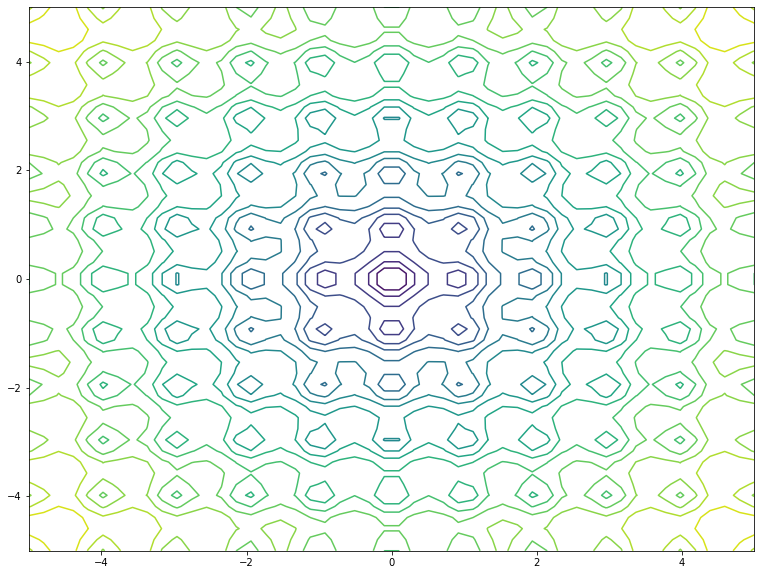

In [8]:
from cost_function import ackley_grid
import matplotlib.pyplot as plt
from giffer import giffer

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)

a = X.reshape(X.shape[0]*X.shape[1], 1)
b = Y.reshape(Y.shape[0]*Y.shape[1], 1)
values = np.concatenate((a, b), axis=1)
Z = ackley_grid(values).reshape((len(Y), len(X)))

fig = plt.figure('curve-set')
plt.ylim(-5,+5)
plt.xlim(-5,+5)
fig.set_size_inches(13, 10)
abx = plt.axes(projection='rectilinear')
plt.contour(X, Y, Z, levels=20)

# standard PSO
for i in range(num_iterations):
    pos = abx.scatter(positions_standard[i][:, 0], positions_standard[i][:, 1], marker='o', c='r')
    num = str(i)
    fig.savefig('/plots/'+num+'.png')
    
    pos.remove()
# end

giffer(num_iterations, "standard_pso.gif")

# memetic PSO
for i in range(num_iterations):
    pos = abx.scatter(positions_memetic[i][:, 0], positions_memetic[i][:, 1], marker='o', c='r')
    num = str(i)
    fig.savefig('/plots/'+num+'.png')
    
    pos.remove()
# end

giffer(num_iterations, "memetic_pso.gif")

- Standard PSO
<img src="standard_pso.gif" width=600>

- Memetic PSO
<img src="memetic_pso.gif" width=600>
